<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_RS_gr1/blob/main/Marfida%20Alexander/A_Marfida_stajirovka_profpatolog_3(ohe_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Стажировка. Профпатолог (INSPECTRUM CLINIC)
- Модели обучения для категориальных данных без удаления NaN в целевом столбце
- Целевые категории:
  - Годен
  - Не годен
  - Ограниченно годен
  - Недостаточно данных для заключения

# ЗАГРУЗКА БИБЛИОТЕК И ДАТАСЕТОВ

In [ ]:
# Подключение библиотек

# Работа с массивами данных
import numpy as np

# Работа с табличными данными
import pandas as pd

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential, Model

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D

# Оптимизаторы
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop

# Токенизатор для преобразования текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Предварительная обработка данных
# from sklearn import preprocessing

# Масштабирование данных
from sklearn.preprocessing import StandardScaler

#from sklearn.datasets import fetch_openml
#from sklearn.model_selection import cross_val_predict
#from sklearn.linear_model import SGDClassifier

# Загрузка датасетов из облака google
import gdown

# Регулярные выражения
import re

# Связь с google-диском
from google.colab import files

# Отрисовка графиков
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Создание статистических графиков
import seaborn as sns

# Табличные данные
from fastai.tabular import *

# Метрики для расчета ошибок
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Разделение данных на выборки
from sklearn.model_selection import train_test_split

# Очистка экрана
from IPython.display import clear_output

# Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

In [ ]:
# Монтирование Goodle-диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Загрузка ранее сохранённых датасетов

In [ ]:
x_train_norm_1 = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_norm_1.npy')
x_train_ohe_1 = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_ohe_1.npy')
y_train_norm_1 = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_norm_1.npy')
y_train_ohe_1 = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_ohe_1.npy')

x_train_norm_1b = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_norm_1b.npy')
x_train_ohe_1b = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_ohe_1b.npy')
y_train_norm_1b = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_norm_1b.npy')
y_train_ohe_1b = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_ohe_1b.npy')

x_train_norm_0 = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_norm_0.npy')
x_train_ohe_0 = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_ohe_0.npy')
y_train_norm_0 = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_norm_0.npy')
y_train_ohe_0 = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_ohe_0.npy')

x_train_norm_0b = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_norm_0b.npy')
x_train_ohe_0b = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_ohe_0b.npy')
y_train_norm_0b = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_norm_0b.npy')
y_train_ohe_0b = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_ohe_0b.npy')

Сохранение датасетов

In [ ]:
np.save('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_norm.npy', x_train_norm)
np.save('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_ohe.npy', x_train_ohe)
np.save('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_norm.npy', y_train_norm)
np.save('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_ohe.npy', y_train_ohe)

# СЛУЖЕБНЫЕ ФУНКЦИИ

Загрузка датасетов

In [ ]:
# x_train_ohe_1 = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_ohe_1.npy')
x_train_ohe_1 = np.load('/content/drive/MyDrive/УИИ(maredmi777)/Стажировка Профпатолог/x_train_ohe_1.npy')
# y_train_norm_1 = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_norm_1.npy')
# y_train_ohe_1 = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_ohe_1.npy')
y_train_ohe_1 = np.load('/content/drive/MyDrive/УИИ(maredmi777)/Стажировка Профпатолог/y_train_ohe_1.npy')
print(x_train_ohe_1.shape)
print(y_train_ohe_1.shape)

(1922, 1987)
(1922, 4)


## Функция графиков обучения

In [ ]:
def graphic(loss, accuracy, valloss, valaccuracy, scor, scorloss, exp, param):
  print(
    f'Входных Нейронов: {param[0]}\n',
    f'Значение Dropout: {param[1]}\n',
    f'BatchNormalization: {param[2]}\n',
    f'Средние потери: {param[3]}\n',
    f'Средняя точность на тестовой выборке: {param[4]}\n'
  )
  print('↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓')

  plt.figure(1, figsize=(20, 5))

  plt.subplot(1, 2, 1)
  plt.plot(accuracy, label='Доля верных ответов(train)')
  plt.plot(valaccuracy, label='Доля верных ответов(val)')
#  plt.scatter(19, scor/100, c='r')
  plt.title(f'Опыт№ {exp+1}. Параметры модели: {param}')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.grid(color='gray', linestyle=':')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(loss, label='train_loss')
  plt.plot(valloss, label='val_loss')
#  plt.scatter(19, scorloss, c='r')
  plt.title(f'Опыт№ {exp+1}, loss')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Ошибка')
  plt.legend()
  plt.grid(color='gray',linestyle=':')
  print()
  plt.show()

## Функция создания модели

In [ ]:
def сreatModel(numN, drop, norm=False, layer2=0, layer3=0):

    # Создание последовательной модели
    model = Sequential()

    if norm:
        model.add(BatchNormalization(input_shape=(x_train.shape[1], )))
        model.add(Dense(numN, activation="relu"))
    else:
        model.add(Dense(numN, input_dim=x_train.shape[1], activation="relu"))

    if layer2 > 0:
      model.add(Dense(numN*layer2, input_dim=x_train.shape[1], activation="relu"))
    elif layer2 < 0:
      model.add(Dense(int(numN/(-layer2)), input_dim=x_train.shape[1], activation="relu"))

    if layer3 > 0:
      model.add(Dense(numN*layer2, input_dim=x_train.shape[1], activation="relu"))
    elif layer3 < 0:
      model.add(Dense(int(numN/(-layer2)), input_dim=x_train.shape[1], activation="relu"))

    model.add(Dropout(drop))
    model.add(Dense(4, activation="softmax")) #

    # Компиляция модели
    model.compile(loss="categorical_crossentropy",
                    optimizer="adam",
                    metrics=["accuracy"])
    return model

## Функция обучения и тестирования модели

In [ ]:
def training(dense_list, drop_list, norm_list, layer2=0, layer3=0):

  parameters = []
  val_accuracy= []
  val_loss_ = []
  accuracy= []
  loss_ = []

  for numN in dense_list:
    for norm in norm_list:
      for drop in drop_list:

        print('Параметры модели: вх.нейр.=', numN, '; откл.нейр.=', drop, '; BatchNormalization=', norm)

        # Создание последовательной модели
        model = сreatModel(numN, drop, norm=norm, layer2=layer2, layer3=layer3)

        # Обучение модели
        history = model.fit(x_train,    # обучающая выборка экземпляры класса
                  y_train,              # обучающая выборка метки класса
                  batch_size=128,       # размер батча
                  epochs=20,            # количество эпох
                  verbose=1,            # 0 - не показывать ход обучения, 1 - показывать
                  validation_data=(x_val, y_val) # выборка для валидации
                  )
        scores = model.evaluate(x_test, y_test)
        print('Точность на тестовой выборке:', scores[1] )

        parameters.append([numN, drop, norm, round(scores[0], 4), round(scores[1], 4)*100])
        val_accuracy.append(history.history['val_accuracy'])
        val_loss_.append(history.history['val_loss'])
        accuracy.append(history.history['accuracy'])
        loss_.append(history.history['loss'])

  return parameters, accuracy, loss_, val_accuracy, val_loss_

## Разделение на обучающую, валидационную и тестовую выборки

In [ ]:
X_tr_n = x_train_ohe_1.copy()
# X_tr_o = x_train_ohe_1
# Y_tr_n = y_train_norm_1
Y_tr_o = y_train_ohe_1.copy()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_trn, Y_trn,
                                                    train_size=0.8,
                                                    random_state=42)#, shuffle=False) # shuffle=False - не перемешивать

In [ ]:
train_sep = int(X_tr_n.shape[0] * 0.8)
x_train, x_test, y_train, y_test =  X_tr_n[:train_sep], X_tr_n[train_sep:], Y_tr_o[:train_sep], Y_tr_o[train_sep:]
print('x_train.shape = ', x_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_train.shape = ', y_train.shape)
print('y_test.shape', y_test.shape)
print()
val_sep = int(x_train.shape[0] * 0.8)
x_train, x_val, y_train, y_val = x_train[:val_sep], x_train[val_sep:], y_train[:val_sep], y_train[val_sep:]
print('x_train.shape = ', x_train.shape)
print('x_val.shape = ', x_val.shape)
print('y_train.shape = ', y_train.shape)
print('y_val.shape', y_val.shape)


x_train.shape =  (1537, 1987)
x_test.shape =  (385, 1987)
y_train.shape =  (1537, 4)
y_test.shape (385, 4)

x_train.shape =  (1229, 1987)
x_val.shape =  (308, 1987)
y_train.shape =  (1229, 4)
y_val.shape (308, 4)


## Создание модели

In [ ]:
model1 = сreatModel(64, 0.1, True)

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 69)               276       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 64)                4480      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,821
Trainable params: 4,683
Non-trainable params: 138
_________________________________________________________________


In [ ]:
y_train

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

### Списки гиперпараметров

In [ ]:
dense_param = [32, 64, 128, 256]             # кол-во нейронов во входном слое
drop_param  = [0.01, 0.25]        # доля отключаемых нейронов, слой Dropout
norm_param = [False, True]             # для BatchNormalization

### Обучение модели с одним слоем

In [ ]:
par, acc, loss, val_acc, val_loss = training(dense_param, drop_param, norm_param)

Параметры модели: вх.нейр.= 32 ; откл.нейр.= 0.01 ; BatchNormalization= False
Epoch 1/20
10/10 [==============================] - 5s 28ms/step - loss: 1.1507 - accuracy: 0.5956 - val_loss: 0.8829 - val_accuracy: 0.6299
Epoch 2/20
10/10 [==============================] - 0s 9ms/step - loss: 0.5079 - accuracy: 0.8438 - val_loss: 0.8706 - val_accuracy: 0.6299
Epoch 3/20
10/10 [==============================] - 0s 7ms/step - loss: 0.4222 - accuracy: 0.8438 - val_loss: 0.7416 - val_accuracy: 0.6299
Epoch 4/20
10/10 [==============================] - 0s 7ms/step - loss: 0.3811 - accuracy: 0.8438 - val_loss: 0.6663 - val_accuracy: 0.6299
Epoch 5/20
10/10 [==============================] - 0s 9ms/step - loss: 0.3567 - accuracy: 0.8478 - val_loss: 0.6384 - val_accuracy: 0.6396
Epoch 6/20
10/10 [==============================] - 0s 9ms/step - loss: 0.3269 - accuracy: 0.8625 - val_loss: 0.6250 - val_accuracy: 0.6818
Epoch 7/20
10/10 [==============================] - 0s 8ms/step - loss: 0.3011 - 

In [ ]:
print(acc[1])
print(val_acc[1], '\n')
print(loss[1])
print(val_loss[1])

[0.8022782802581787, 0.8437754511833191, 0.8437754511833191, 0.8527258038520813, 0.8649308085441589, 0.8860862255096436, 0.9064279794692993, 0.8999186158180237, 0.9259560704231262, 0.9210740327835083, 0.9283970594406128, 0.9397884607315063, 0.9422294497489929, 0.9511798024177551, 0.9576891660690308, 0.9552481770515442, 0.9617575407028198, 0.9641985297203064, 0.9698942303657532, 0.9698942303657532]
[0.6298701167106628, 0.6298701167106628, 0.6298701167106628, 0.6298701167106628, 0.6720778942108154, 0.7142857313156128, 0.7175324559211731, 0.7402597665786743, 0.7435064911842346, 0.7532467246055603, 0.7532467246055603, 0.7564935088157654, 0.7727272510528564, 0.7727272510528564, 0.7954545617103577, 0.7889610528945923, 0.8311688303947449, 0.8279221057891846, 0.8409090638160706, 0.8409090638160706] 

[0.8526501059532166, 0.5037805438041687, 0.45147353410720825, 0.3983067274093628, 0.35087281465530396, 0.3127226233482361, 0.2847517132759094, 0.2730379104614258, 0.25143367052078247, 0.2295169383

In [ ]:
print(np.array(acc[0]).max())
print(np.array(val_acc[0]).max())
print(np.array(loss[0]).min())
print(np.array(val_loss[0]).min())

0.970707893371582
0.8311688303947449
0.11749888211488724
0.3939269483089447


In [ ]:
par

[[32, 0.01, False, 0.4109, 82.6],
 [32, 0.25, False, 0.4059, 82.86],
 [32, 0.01, True, 0.7666, 77.14],
 [32, 0.25, True, 0.7508, 77.92],
 [64, 0.01, False, 0.4008, 83.38],
 [64, 0.25, False, 0.3871, 83.12],
 [64, 0.01, True, 0.7978, 77.14],
 [64, 0.25, True, 0.776, 78.18],
 [128, 0.01, False, 0.3739, 84.94],
 [128, 0.25, False, 0.3976, 83.89999999999999],
 [128, 0.01, True, 0.6374, 81.04],
 [128, 0.25, True, 0.8184, 78.7],
 [256, 0.01, False, 0.4093, 82.86],
 [256, 0.25, False, 0.3716, 84.94],
 [256, 0.01, True, 0.7432, 80.25999999999999],
 [256, 0.25, True, 0.6437, 78.7]]

#### Сводные результаты обучения

In [ ]:
col = [' Число Нейронов ', ' Значение Dropout ',' BatchNormalization? ',' Loss тестовой ', ' Точность тестовой ']
df = pd.DataFrame(par, columns = col, index= np.arange(1, len(par)+1))
df

Число Нейронов    Значение Dropout    BatchNormalization?   \
1                 32                0.01                  False   
2                 32                0.25                  False   
3                 32                0.01                   True   
4                 32                0.25                   True   
5                 64                0.01                  False   
6                 64                0.25                  False   
7                 64                0.01                   True   
8                 64                0.25                   True   
9                128                0.01                  False   
10               128                0.25                  False   
11               128                0.01                   True   
12               128                0.25                   True   
13               256                0.01                  False   
14               256                0.25                  False   
15               256                0.01                   True   
16               256                0.25                   True   

     Loss тестовой    Точность тестовой   
1            0.4109                82.60  
2            0.4059                82.86  
3            0.7666                77.14  
4            0.7508                77.92  
5            0.4008                83.38  
6            0.3871                83.12  
7            0.7978                77.14  
8            0.7760                78.18  
9            0.3739                84.94  
10           0.3976                83.90  
11           0.6374                81.04  
12           0.8184                78.70  
13           0.4093                82.86  
14           0.3716                84.94  
15           0.7432                80.26  
16           0.6437                78.70

#### Графики обучения

Входных Нейронов: 32
 Значение Dropout: 0.01
 BatchNormalization: False
 Средние потери: 0.4109
 Средняя точность на тестовой выборке: 82.6

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



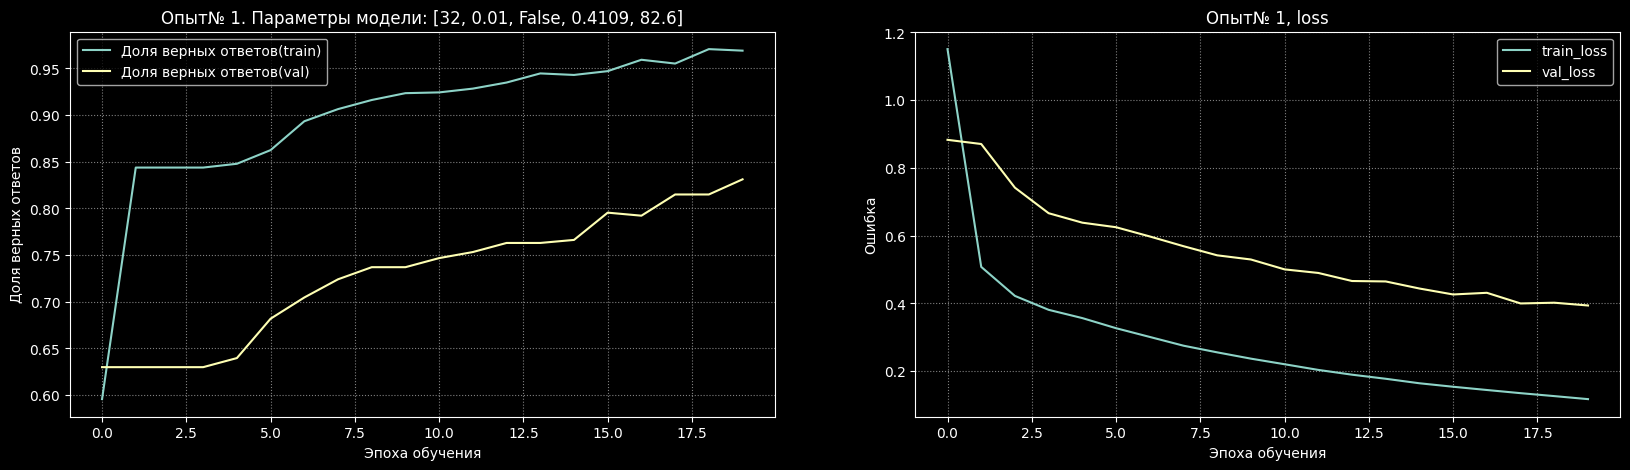

Входных Нейронов: 32
 Значение Dropout: 0.25
 BatchNormalization: False
 Средние потери: 0.4059
 Средняя точность на тестовой выборке: 82.86

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



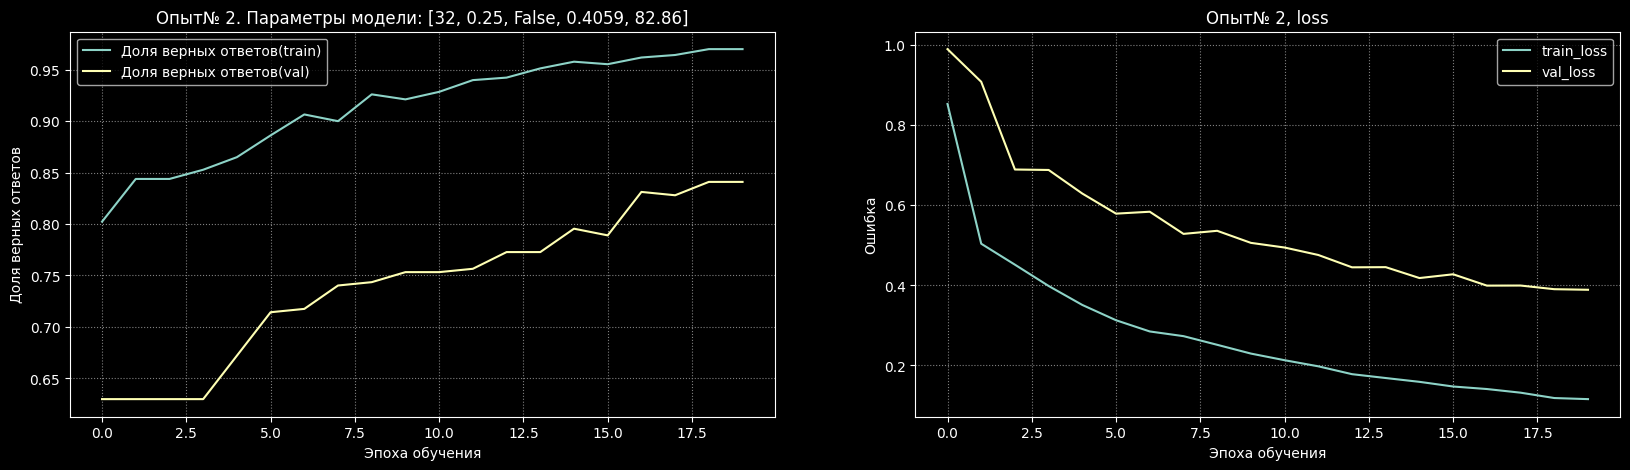

Входных Нейронов: 32
 Значение Dropout: 0.01
 BatchNormalization: True
 Средние потери: 0.7666
 Средняя точность на тестовой выборке: 77.14

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



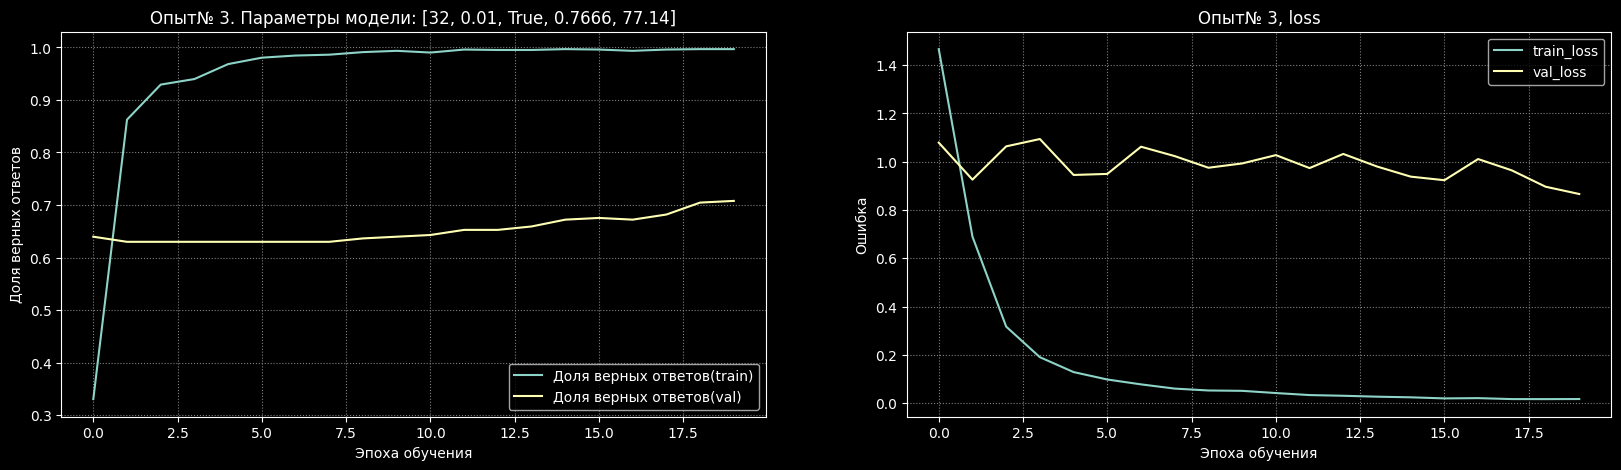

Входных Нейронов: 32
 Значение Dropout: 0.25
 BatchNormalization: True
 Средние потери: 0.7508
 Средняя точность на тестовой выборке: 77.92

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



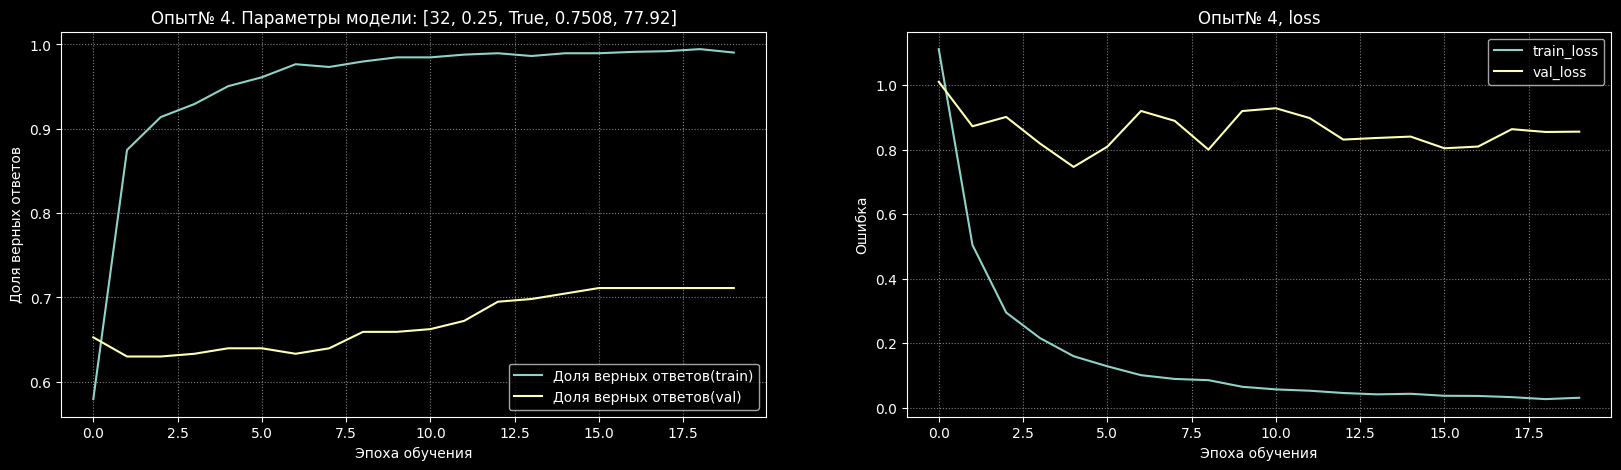

Входных Нейронов: 64
 Значение Dropout: 0.01
 BatchNormalization: False
 Средние потери: 0.4008
 Средняя точность на тестовой выборке: 83.38

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



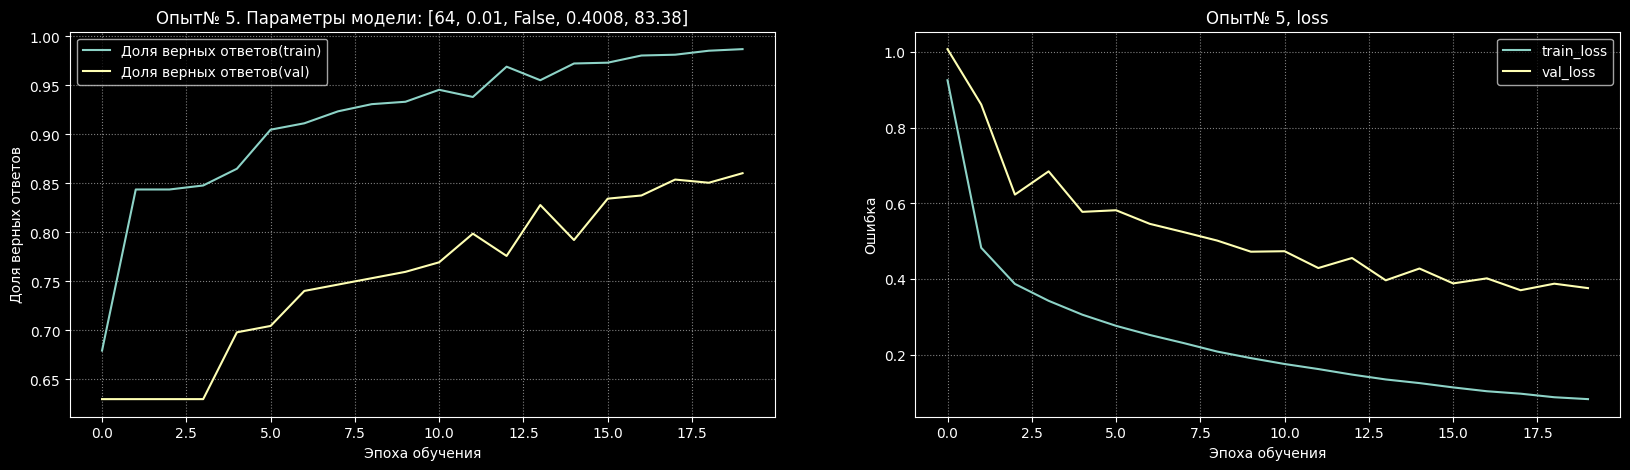

Входных Нейронов: 64
 Значение Dropout: 0.25
 BatchNormalization: False
 Средние потери: 0.3871
 Средняя точность на тестовой выборке: 83.12

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



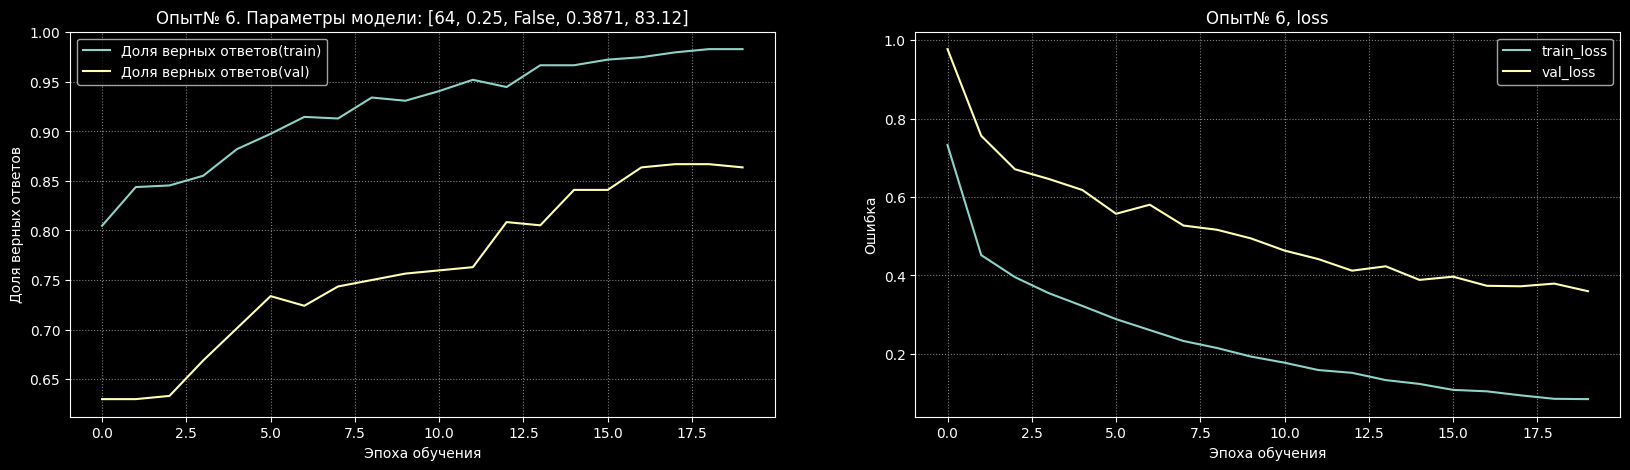

Входных Нейронов: 64
 Значение Dropout: 0.01
 BatchNormalization: True
 Средние потери: 0.7978
 Средняя точность на тестовой выборке: 77.14

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



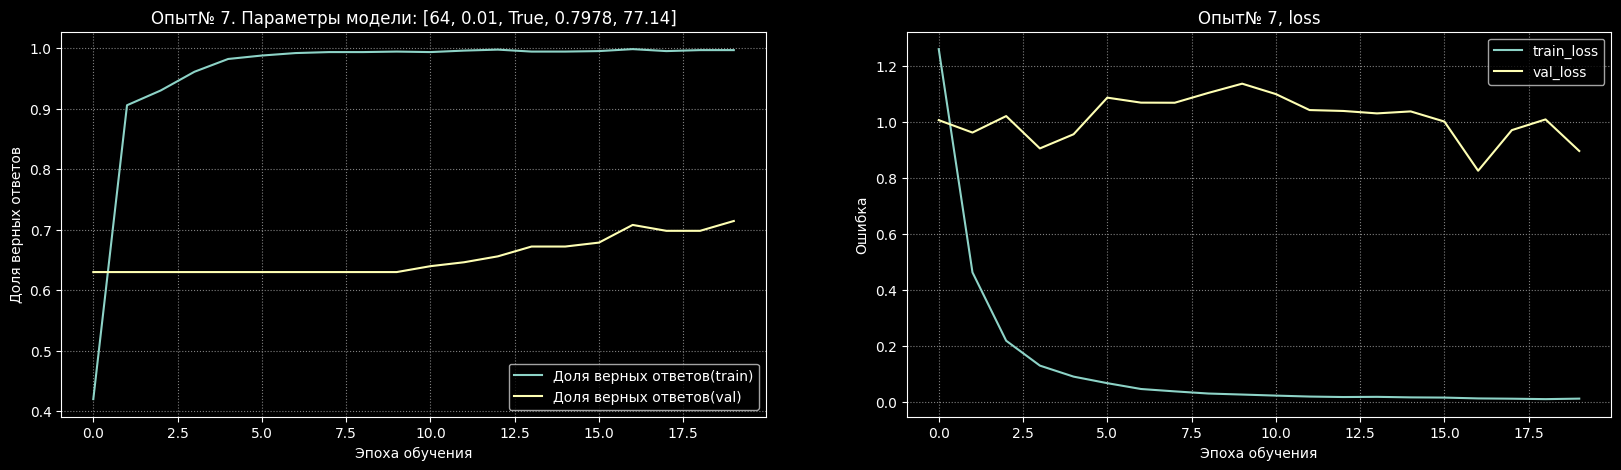

Входных Нейронов: 64
 Значение Dropout: 0.25
 BatchNormalization: True
 Средние потери: 0.776
 Средняя точность на тестовой выборке: 78.18

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



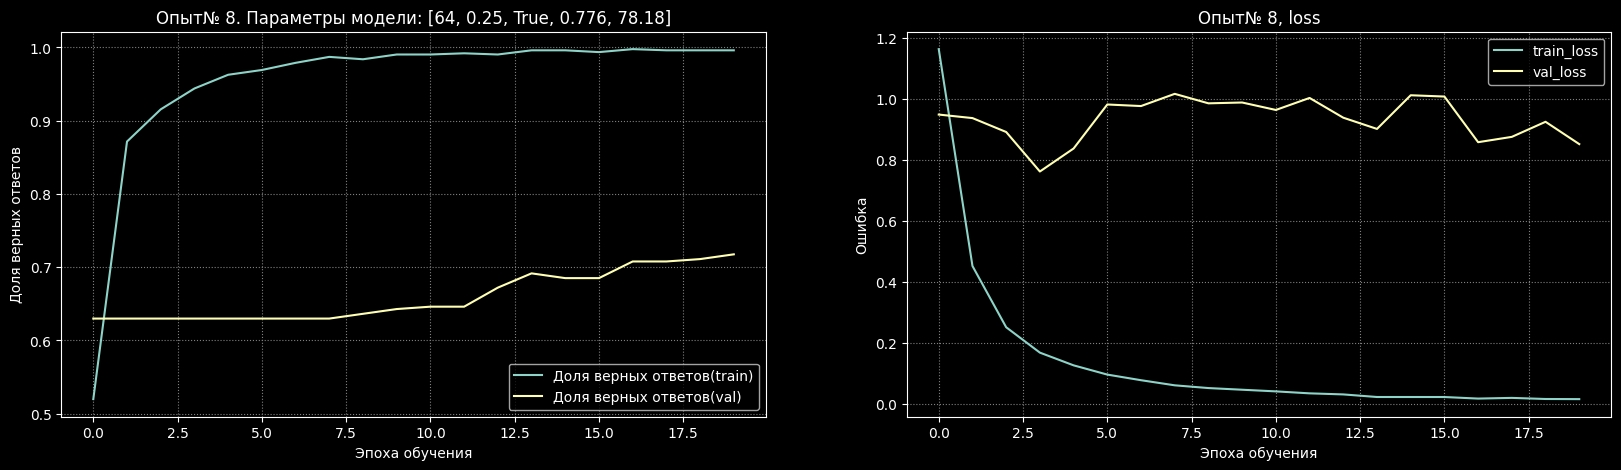

Входных Нейронов: 128
 Значение Dropout: 0.01
 BatchNormalization: False
 Средние потери: 0.3739
 Средняя точность на тестовой выборке: 84.94

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



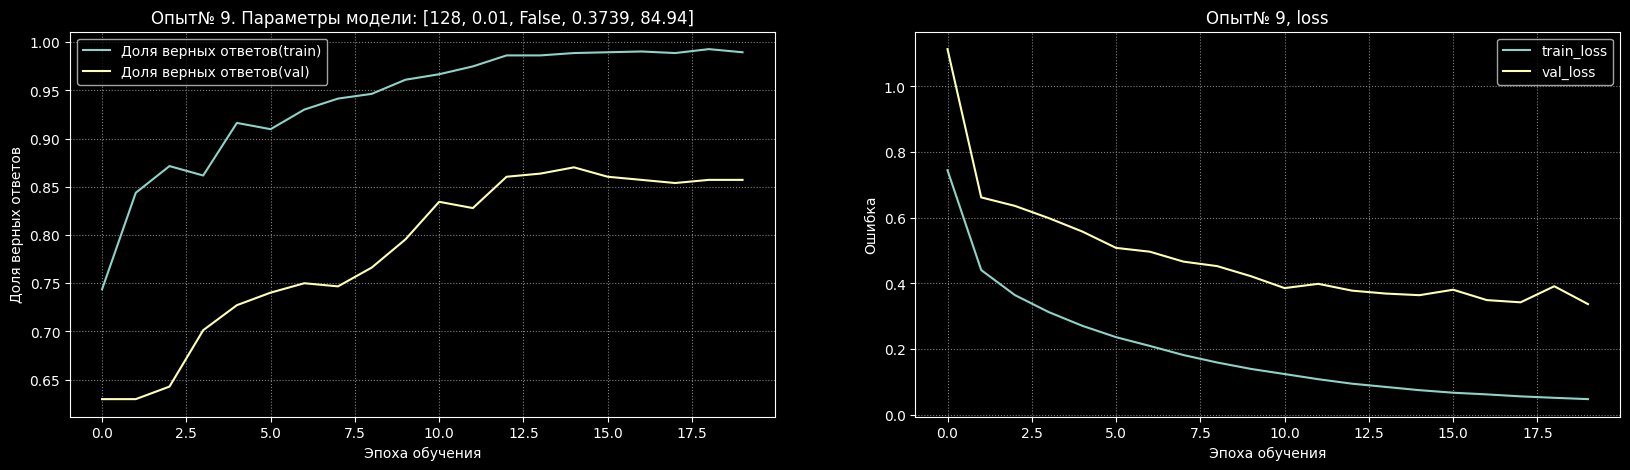

Входных Нейронов: 128
 Значение Dropout: 0.25
 BatchNormalization: False
 Средние потери: 0.3976
 Средняя точность на тестовой выборке: 83.89999999999999

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



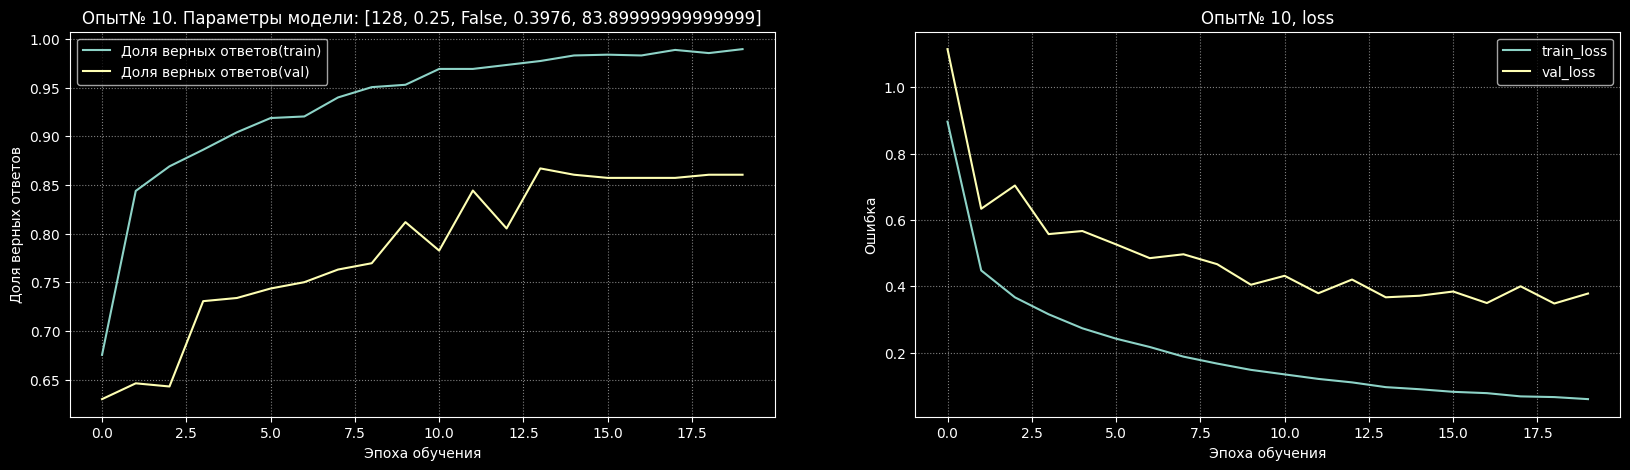

Входных Нейронов: 128
 Значение Dropout: 0.01
 BatchNormalization: True
 Средние потери: 0.6374
 Средняя точность на тестовой выборке: 81.04

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



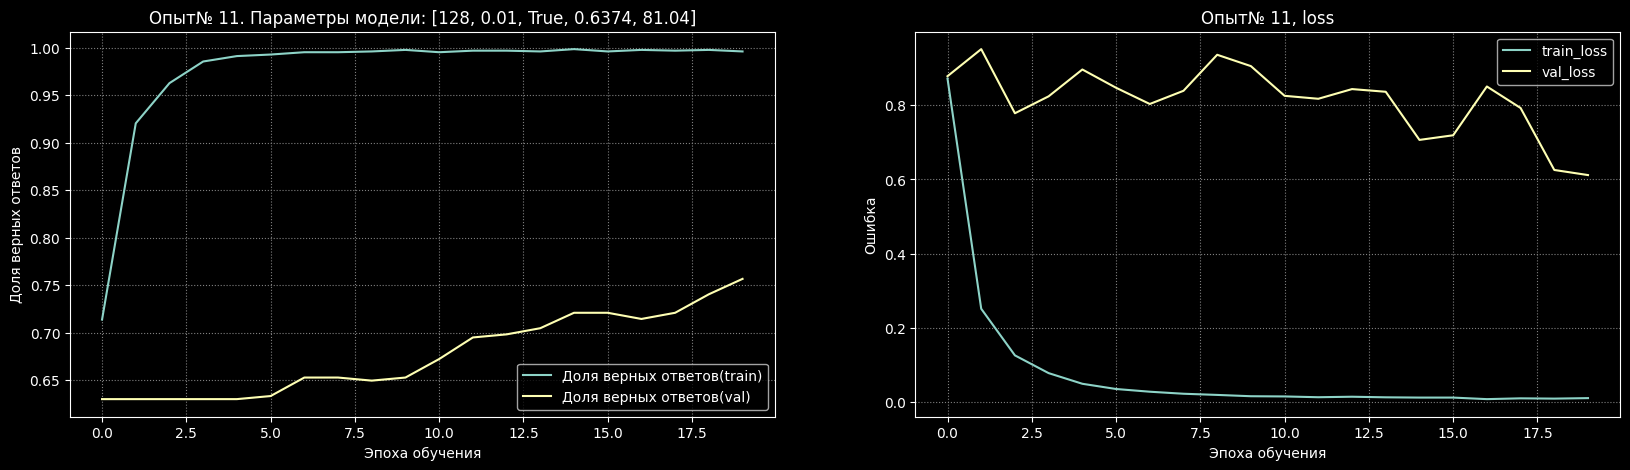

Входных Нейронов: 128
 Значение Dropout: 0.25
 BatchNormalization: True
 Средние потери: 0.8184
 Средняя точность на тестовой выборке: 78.7

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



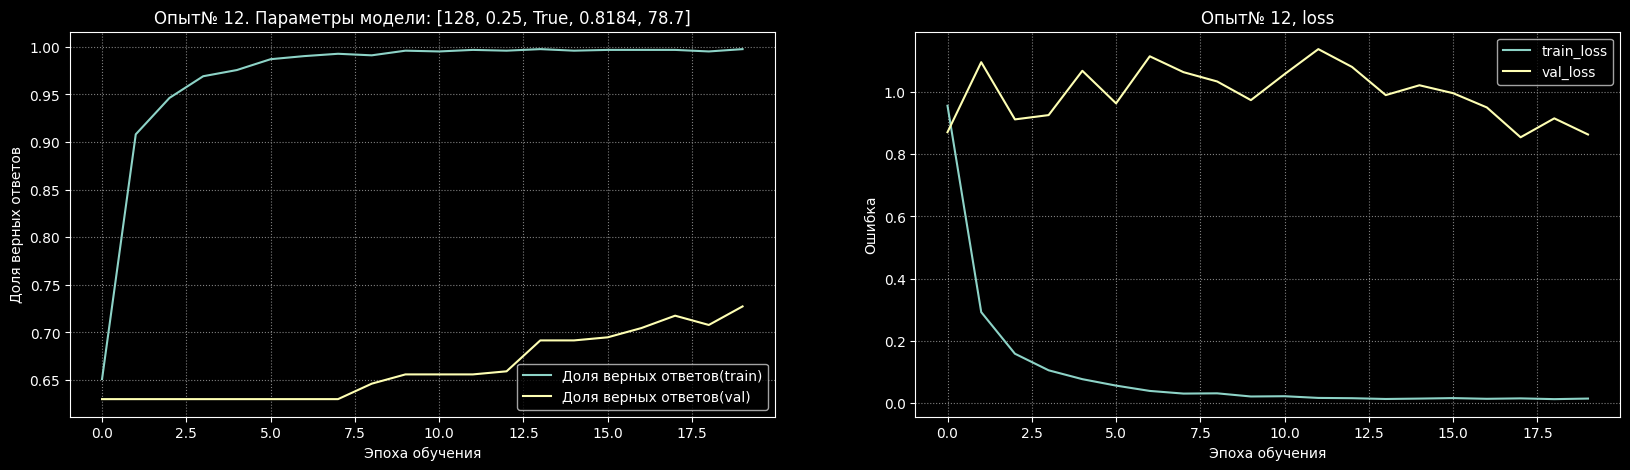

Входных Нейронов: 256
 Значение Dropout: 0.01
 BatchNormalization: False
 Средние потери: 0.4093
 Средняя точность на тестовой выборке: 82.86

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



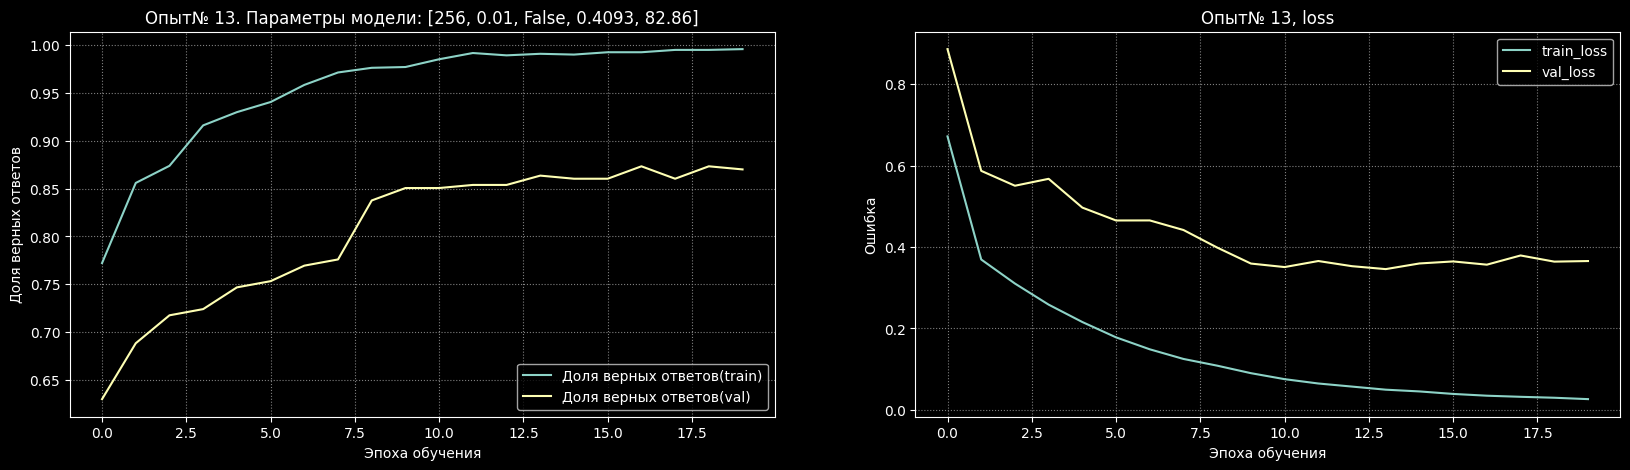

Входных Нейронов: 256
 Значение Dropout: 0.25
 BatchNormalization: False
 Средние потери: 0.3716
 Средняя точность на тестовой выборке: 84.94

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



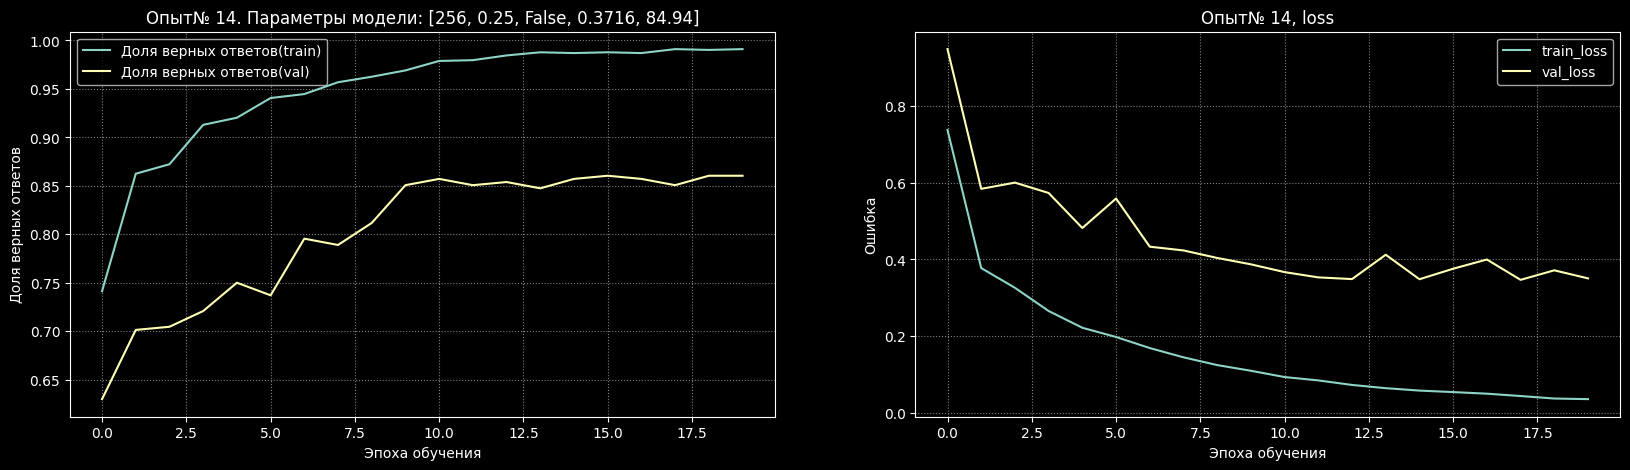

Входных Нейронов: 256
 Значение Dropout: 0.01
 BatchNormalization: True
 Средние потери: 0.7432
 Средняя точность на тестовой выборке: 80.25999999999999

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



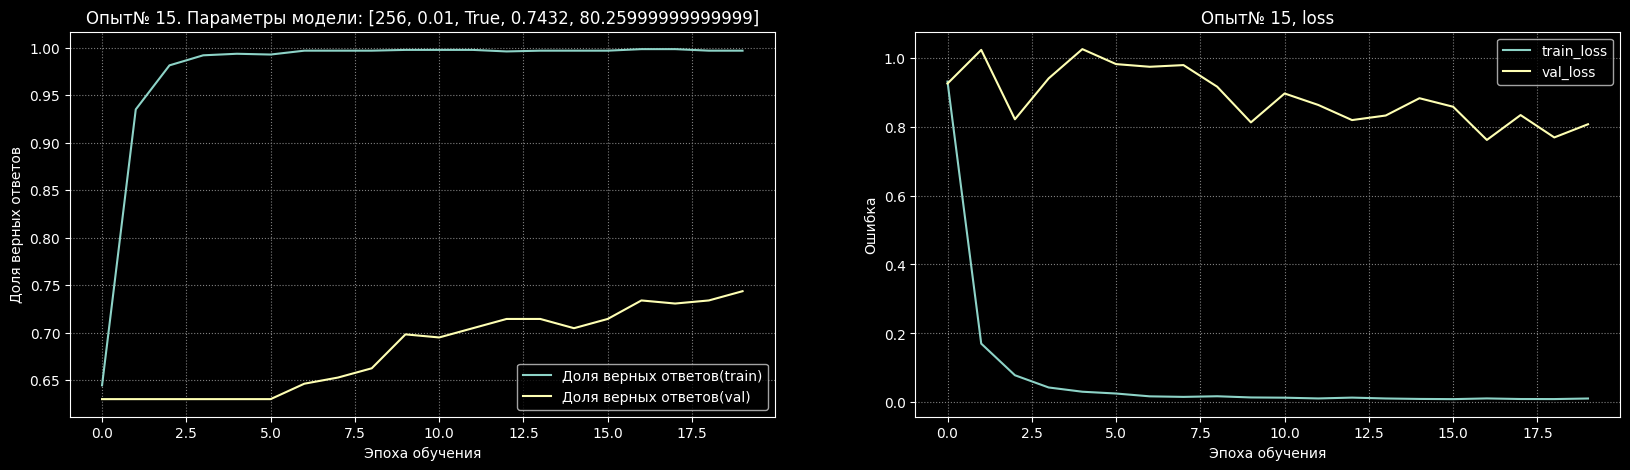

Входных Нейронов: 256
 Значение Dropout: 0.25
 BatchNormalization: True
 Средние потери: 0.6437
 Средняя точность на тестовой выборке: 78.7

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



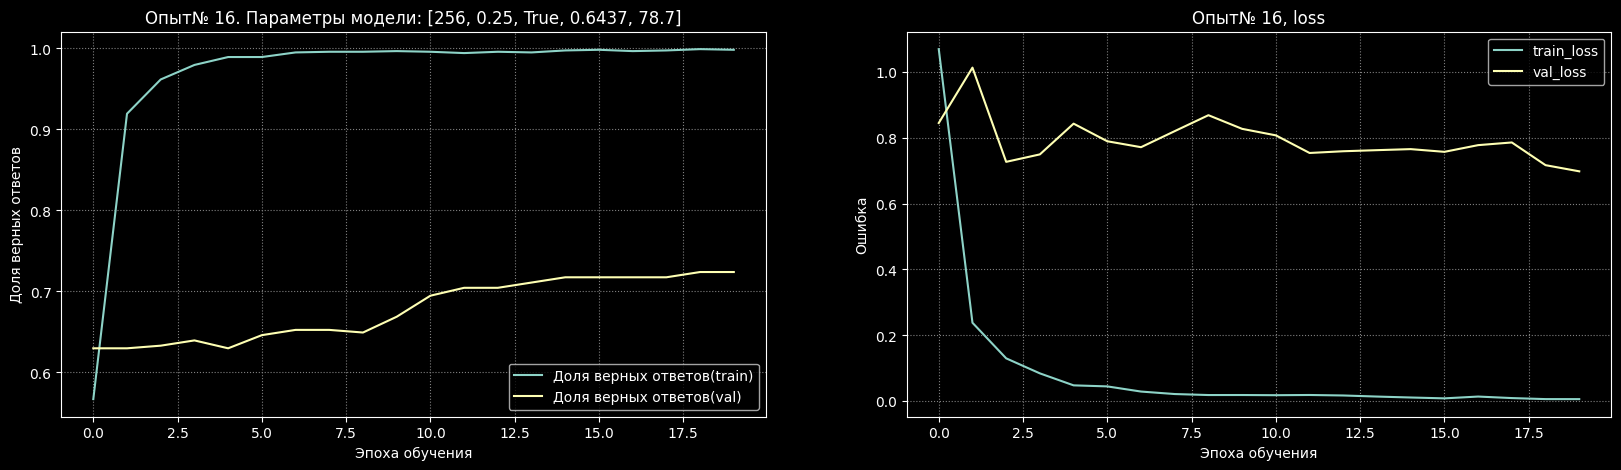

In [ ]:
for exp in range(len(val_loss)):
    graphic(loss[exp], acc[exp], val_loss[exp], val_acc[exp],
            par[exp][-1], par[exp][-2], exp, par[exp])


### Обучение модели с двумя слоями

In [ ]:
par, acc, loss, val_acc, val_loss = training(dense_param, drop_param, norm_param, 2)

Параметры модели: вх.нейр.= 32 ; откл.нейр.= 0.01 ; BatchNormalization= False
Epoch 1/20
10/10 [==============================] - 1s 24ms/step - loss: 1.2643 - accuracy: 0.6013 - val_loss: 1.1452 - val_accuracy: 0.6299
Epoch 2/20
10/10 [==============================] - 0s 7ms/step - loss: 0.8149 - accuracy: 0.8438 - val_loss: 0.9868 - val_accuracy: 0.6299
Epoch 3/20
10/10 [==============================] - 0s 7ms/step - loss: 0.5401 - accuracy: 0.8438 - val_loss: 1.0038 - val_accuracy: 0.6299
Epoch 4/20
10/10 [==============================] - 0s 8ms/step - loss: 0.4539 - accuracy: 0.8438 - val_loss: 0.7652 - val_accuracy: 0.6299
Epoch 5/20
10/10 [==============================] - 0s 8ms/step - loss: 0.4002 - accuracy: 0.8438 - val_loss: 0.7060 - val_accuracy: 0.6299
Epoch 6/20
10/10 [==============================] - 0s 9ms/step - loss: 0.3621 - accuracy: 0.8454 - val_loss: 0.6754 - val_accuracy: 0.6299
Epoch 7/20
10/10 [==============================] - 0s 8ms/step - loss: 0.3284 - 

#### Сводные результаты обучения

In [ ]:
print('2-й слой нейронов = Вх. слой * 2')
col = [' Число Нейронов ', ' Значение Dropout ',' BatchNormalization? ',' Loss тестовой ', ' Точность тестовой ']
df = pd.DataFrame(par, columns = col, index= np.arange(1, len(par)+1))
df

2-й слой нейронов = Вх. слой * 2


Число Нейронов    Значение Dropout    BatchNormalization?   \
1                 32                0.01                  False   
2                 32                0.25                  False   
3                 32                0.01                   True   
4                 32                0.25                   True   
5                 64                0.01                  False   
6                 64                0.25                  False   
7                 64                0.01                   True   
8                 64                0.25                   True   
9                128                0.01                  False   
10               128                0.25                  False   
11               128                0.01                   True   
12               128                0.25                   True   
13               256                0.01                  False   
14               256                0.25                  False   
15               256                0.01                   True   
16               256                0.25                   True   

     Loss тестовой    Точность тестовой   
1            0.4084                84.16  
2            0.3806                84.16  
3            0.8562                78.96  
4            0.8400                80.78  
5            0.4794                83.64  
6            0.4173                84.68  
7            0.7664                81.30  
8            0.7348                81.82  
9            0.5371                82.08  
10           0.5343                84.16  
11           0.7139                80.78  
12           0.6085                82.86  
13           0.6584                78.44  
14           0.6100                83.12  
15           0.6570                82.60  
16           0.6598                83.12

#### Графики обучения

Входных Нейронов: 32
 Значение Dropout: 0.01
 BatchNormalization: False
 Средние потери: 0.4084
 Средняя точность на тестовой выборке: 84.16

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



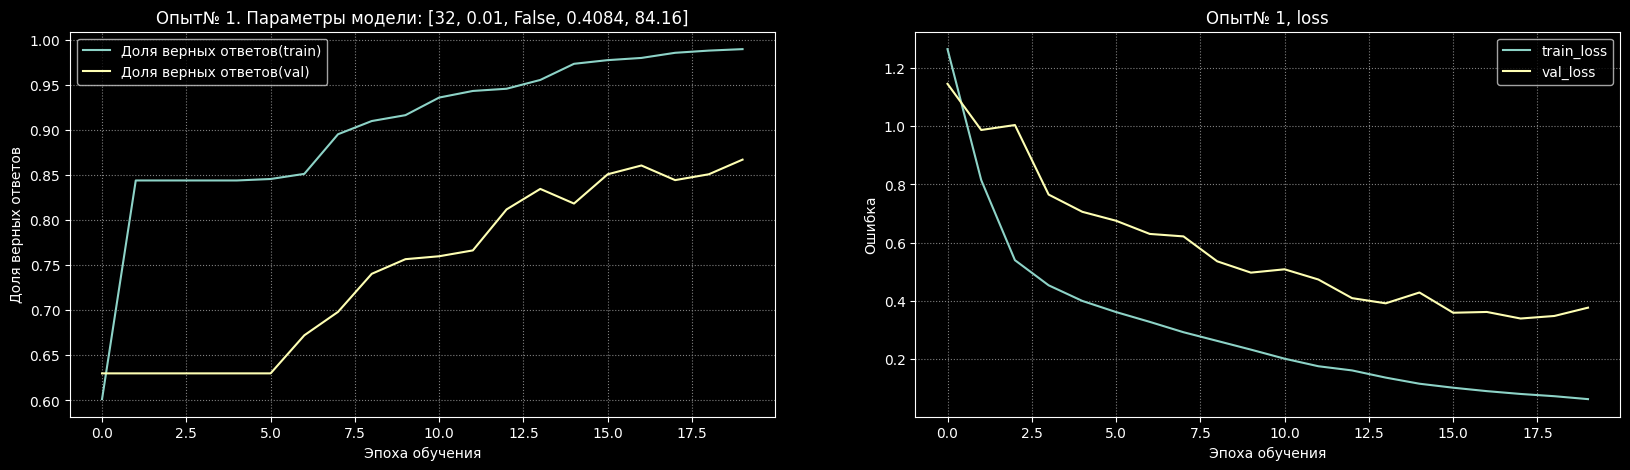

Входных Нейронов: 32
 Значение Dropout: 0.25
 BatchNormalization: False
 Средние потери: 0.3806
 Средняя точность на тестовой выборке: 84.16

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



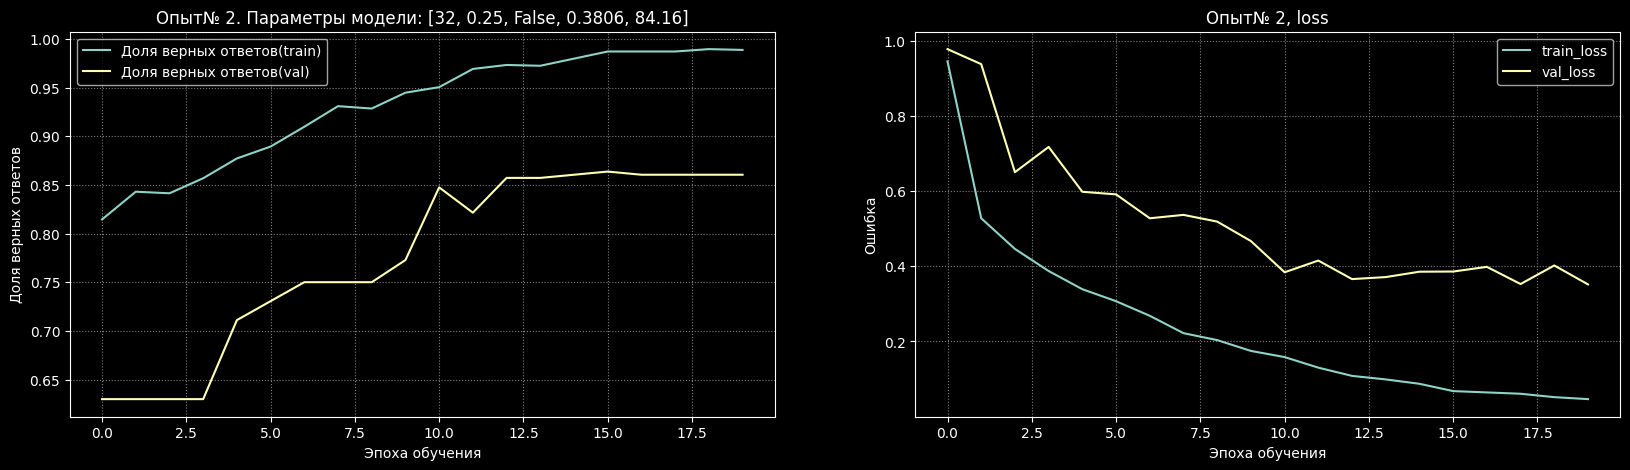

Входных Нейронов: 32
 Значение Dropout: 0.01
 BatchNormalization: True
 Средние потери: 0.8562
 Средняя точность на тестовой выборке: 78.96

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



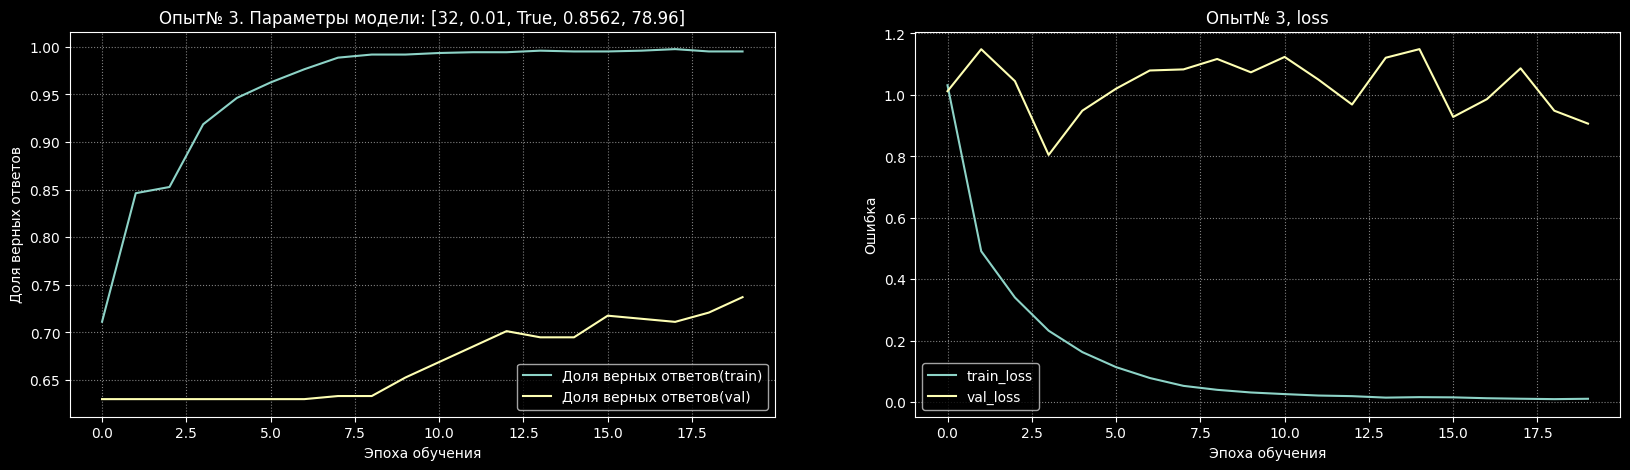

Входных Нейронов: 32
 Значение Dropout: 0.25
 BatchNormalization: True
 Средние потери: 0.84
 Средняя точность на тестовой выборке: 80.78

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



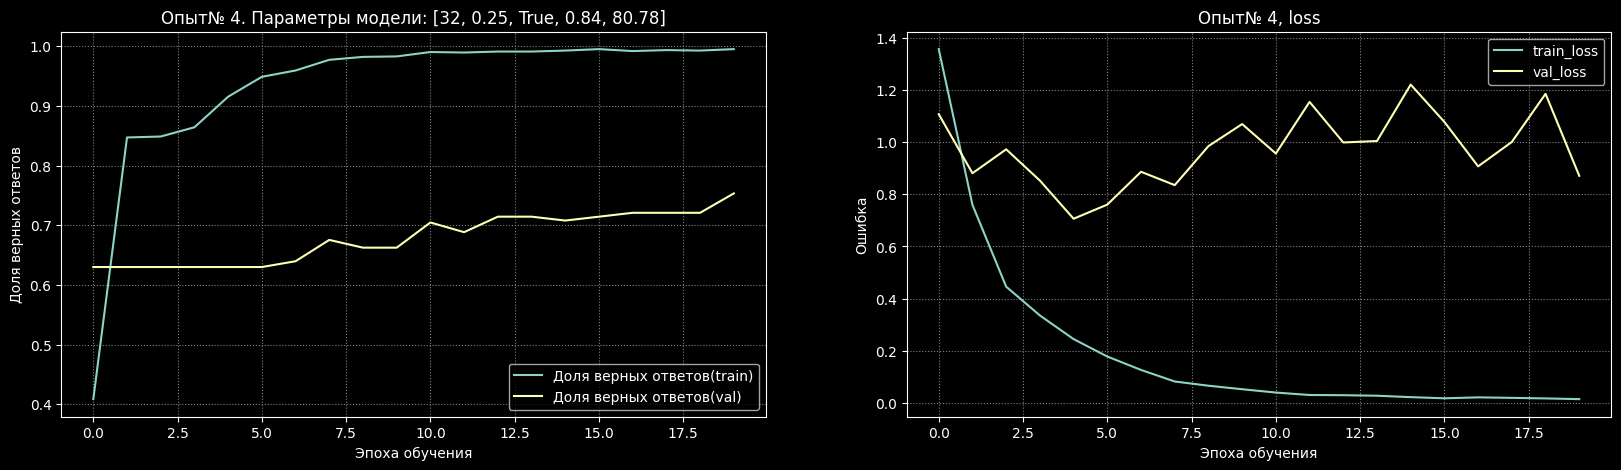

Входных Нейронов: 64
 Значение Dropout: 0.01
 BatchNormalization: False
 Средние потери: 0.4794
 Средняя точность на тестовой выборке: 83.64

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



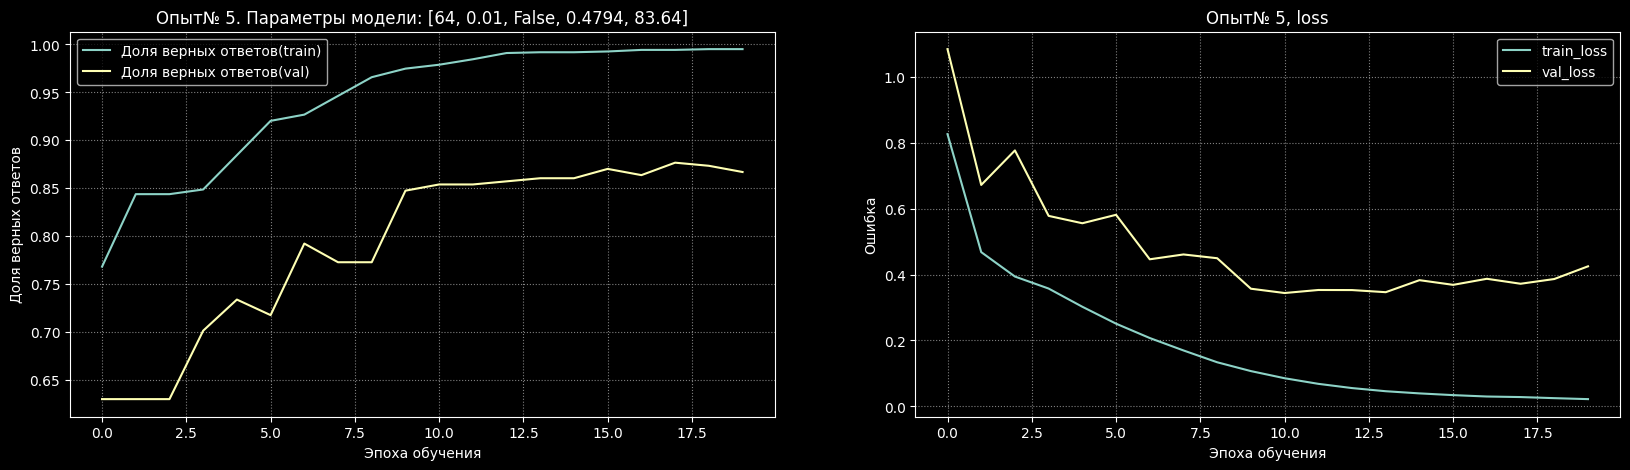

Входных Нейронов: 64
 Значение Dropout: 0.25
 BatchNormalization: False
 Средние потери: 0.4173
 Средняя точность на тестовой выборке: 84.68

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



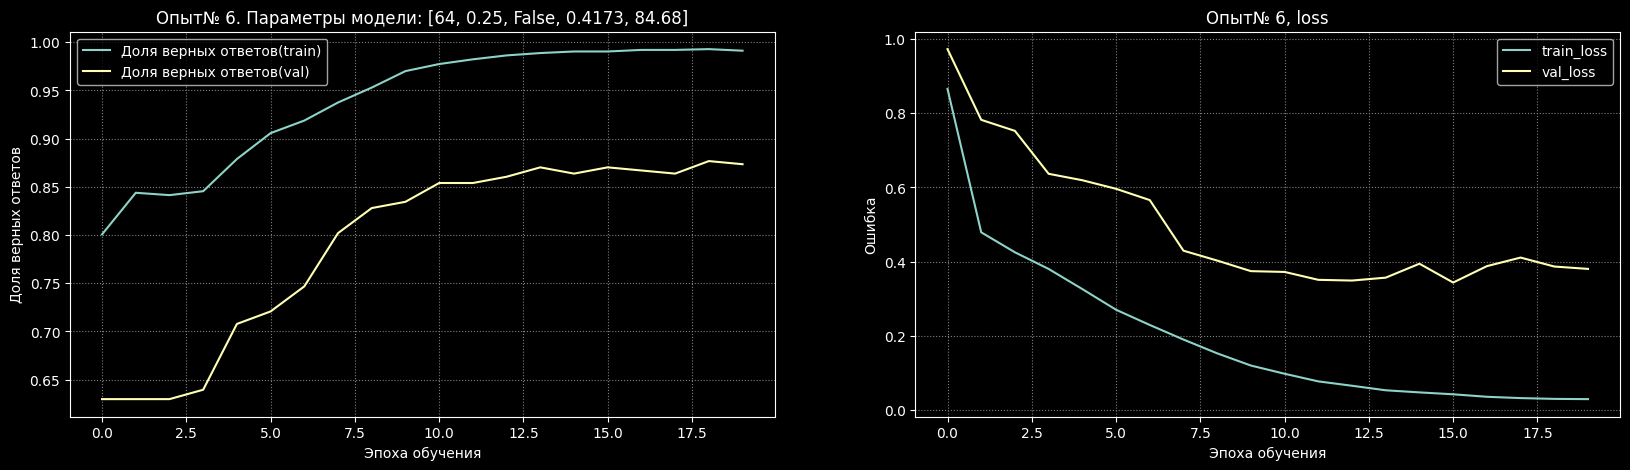

Входных Нейронов: 64
 Значение Dropout: 0.01
 BatchNormalization: True
 Средние потери: 0.7664
 Средняя точность на тестовой выборке: 81.3

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



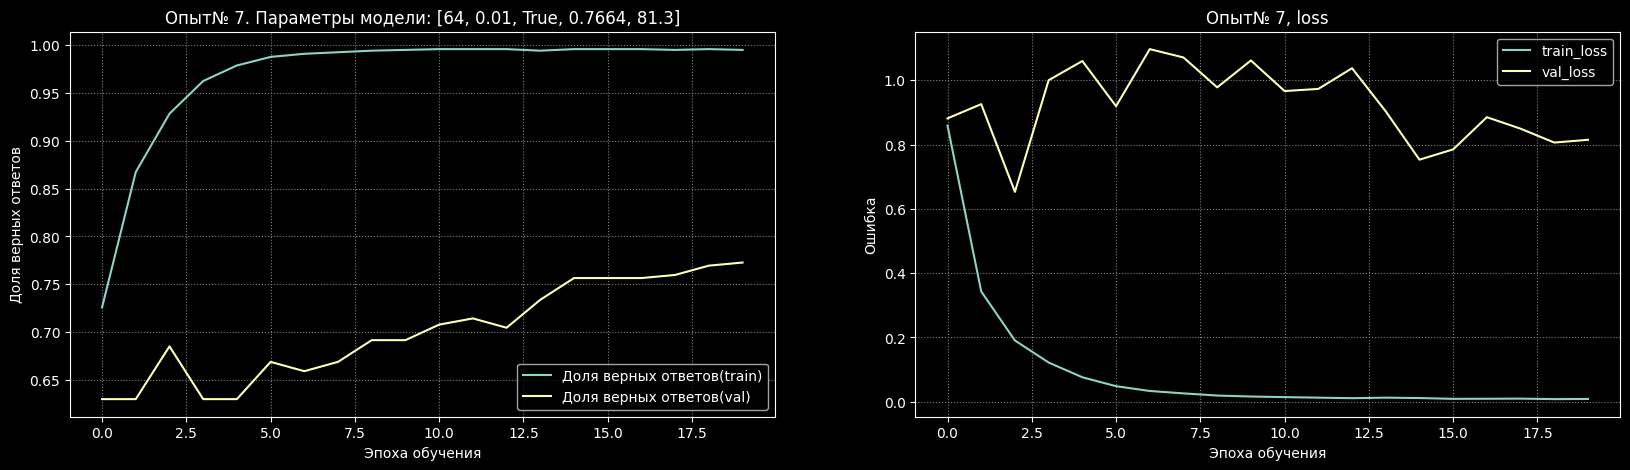

Входных Нейронов: 64
 Значение Dropout: 0.25
 BatchNormalization: True
 Средние потери: 0.7348
 Средняя точность на тестовой выборке: 81.82000000000001

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



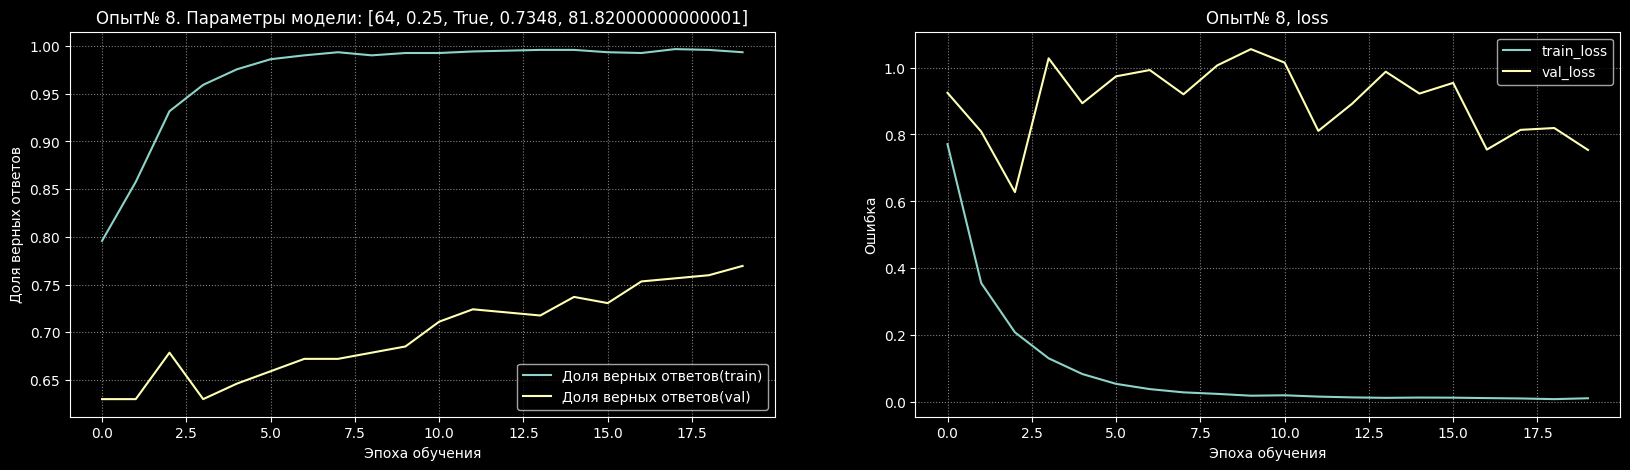

Входных Нейронов: 128
 Значение Dropout: 0.01
 BatchNormalization: False
 Средние потери: 0.5371
 Средняя точность на тестовой выборке: 82.08

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



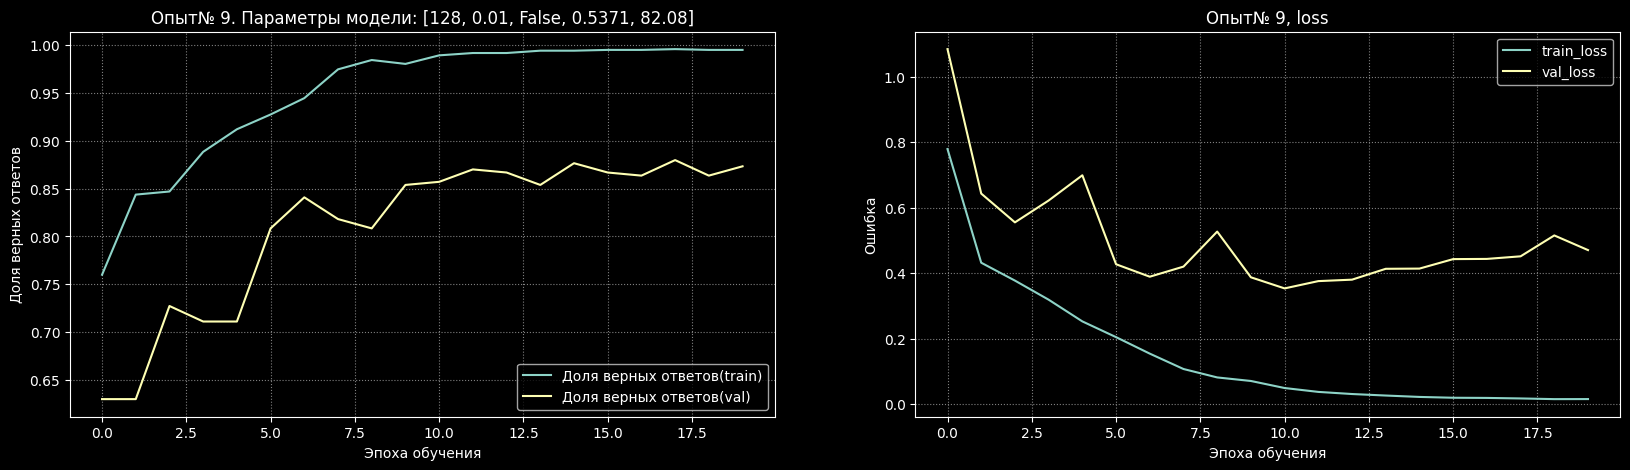

Входных Нейронов: 128
 Значение Dropout: 0.25
 BatchNormalization: False
 Средние потери: 0.5343
 Средняя точность на тестовой выборке: 84.16

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



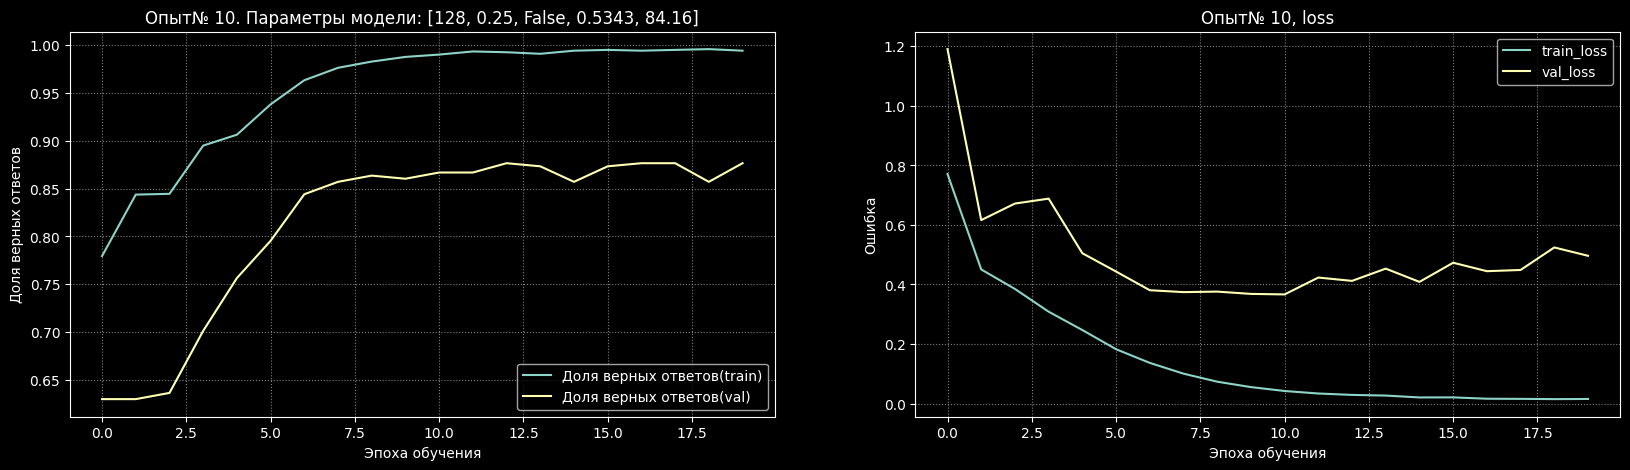

Входных Нейронов: 128
 Значение Dropout: 0.01
 BatchNormalization: True
 Средние потери: 0.7139
 Средняя точность на тестовой выборке: 80.78

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



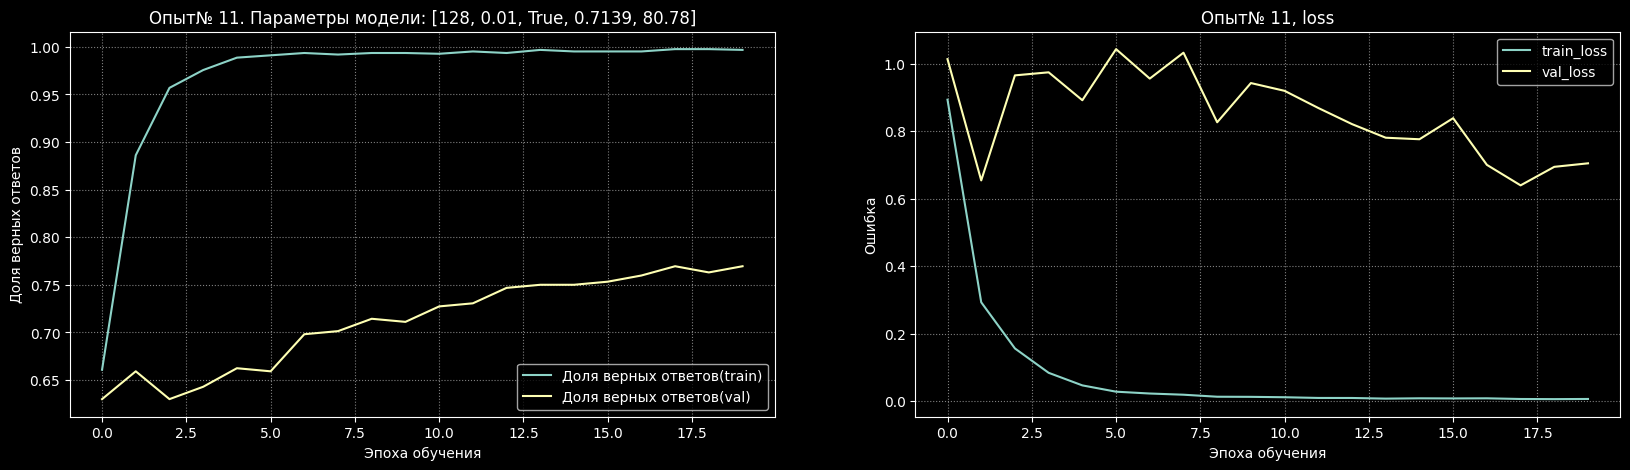

Входных Нейронов: 128
 Значение Dropout: 0.25
 BatchNormalization: True
 Средние потери: 0.6085
 Средняя точность на тестовой выборке: 82.86

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



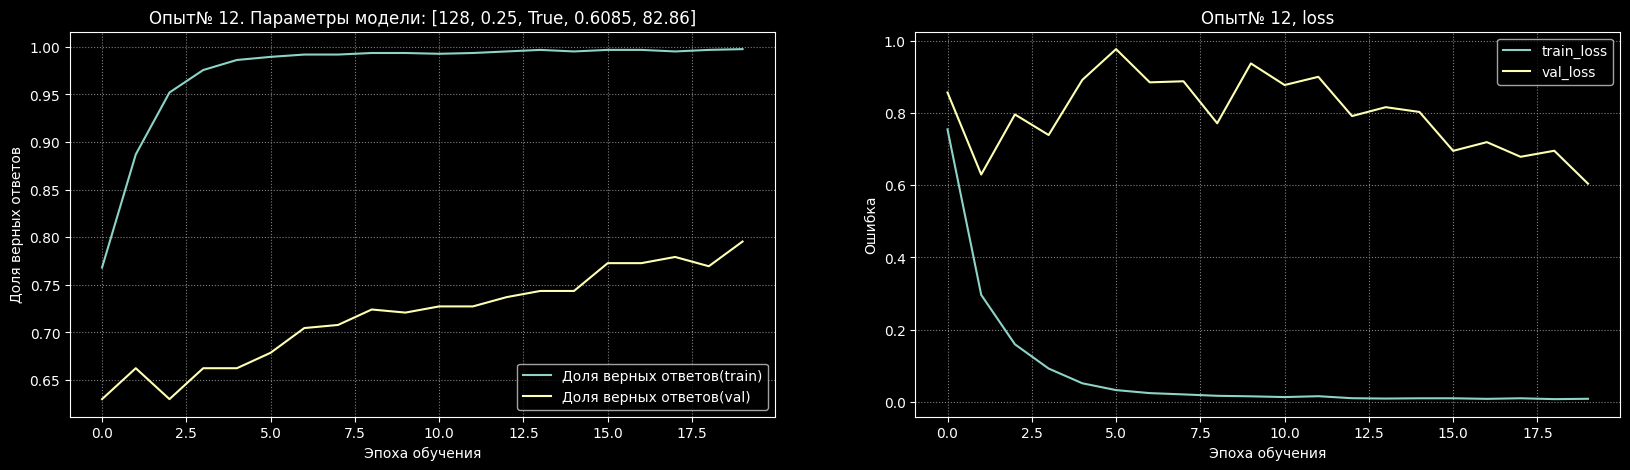

Входных Нейронов: 256
 Значение Dropout: 0.01
 BatchNormalization: False
 Средние потери: 0.6584
 Средняя точность на тестовой выборке: 78.44

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



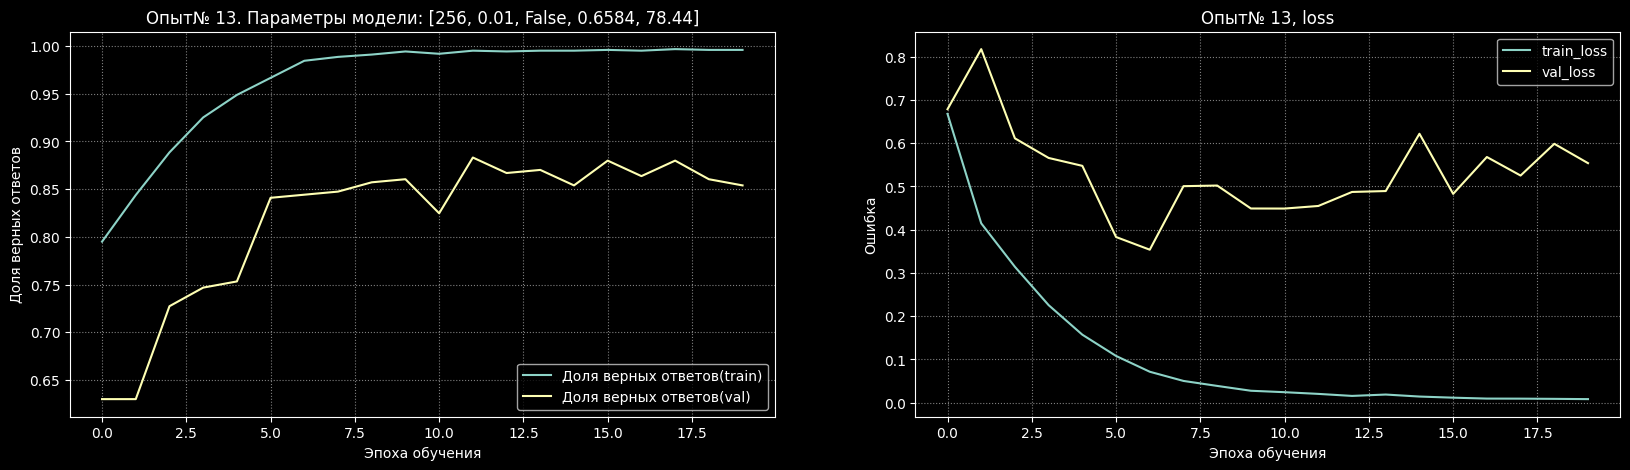

Входных Нейронов: 256
 Значение Dropout: 0.25
 BatchNormalization: False
 Средние потери: 0.61
 Средняя точность на тестовой выборке: 83.12

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



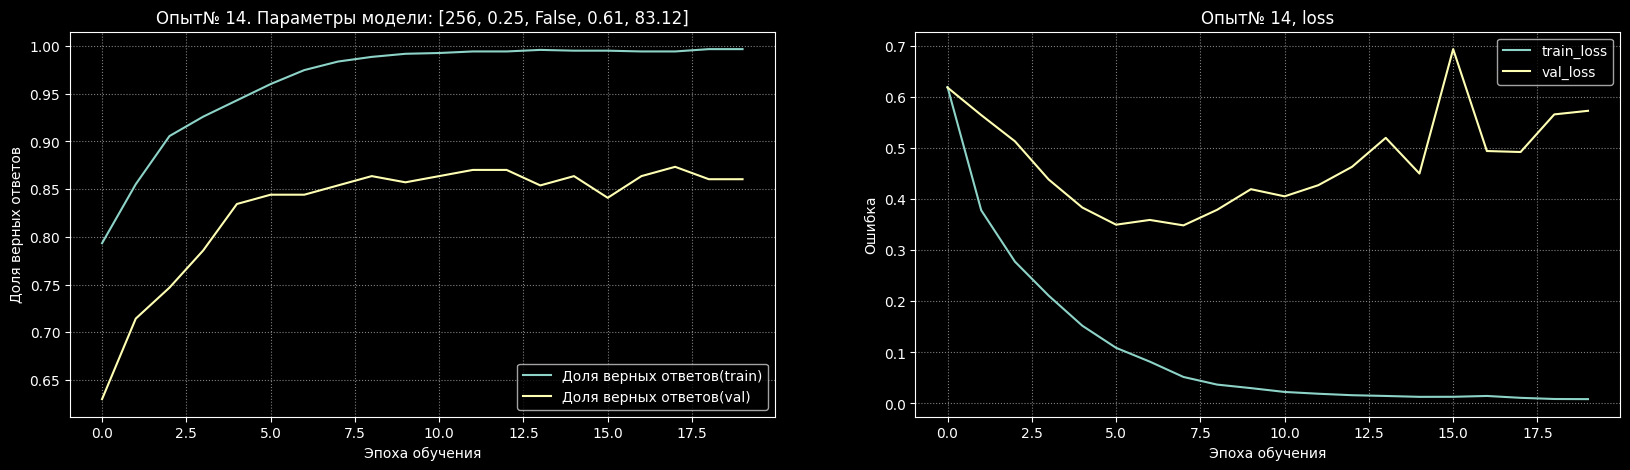

Входных Нейронов: 256
 Значение Dropout: 0.01
 BatchNormalization: True
 Средние потери: 0.657
 Средняя точность на тестовой выборке: 82.6

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



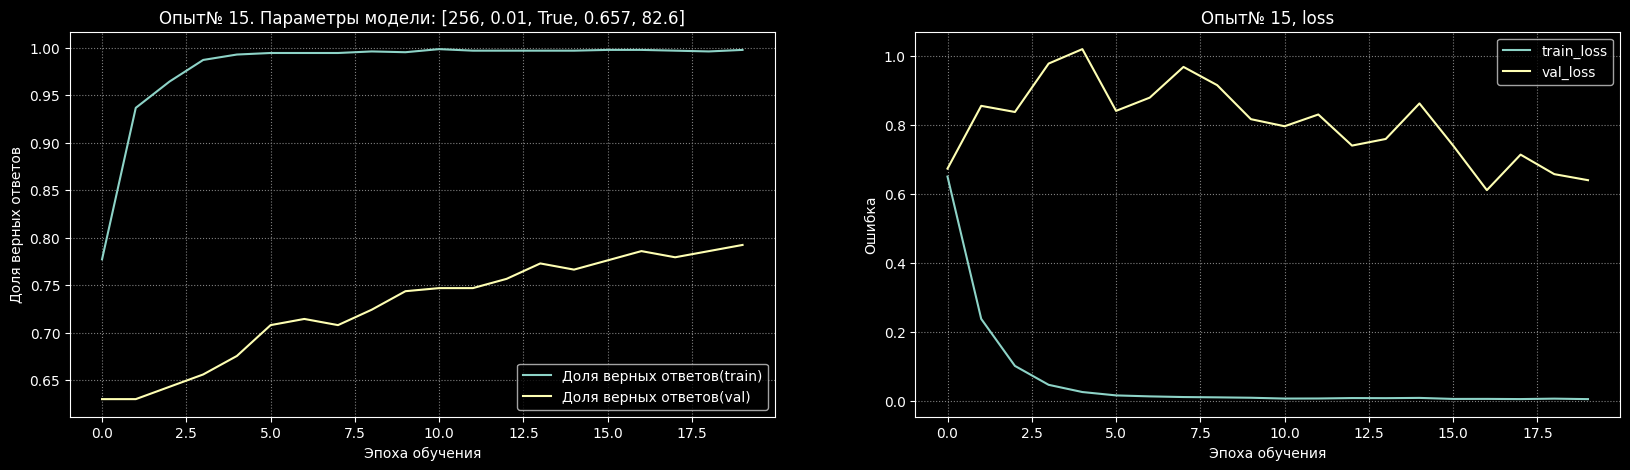

Входных Нейронов: 256
 Значение Dropout: 0.25
 BatchNormalization: True
 Средние потери: 0.6598
 Средняя точность на тестовой выборке: 83.12

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



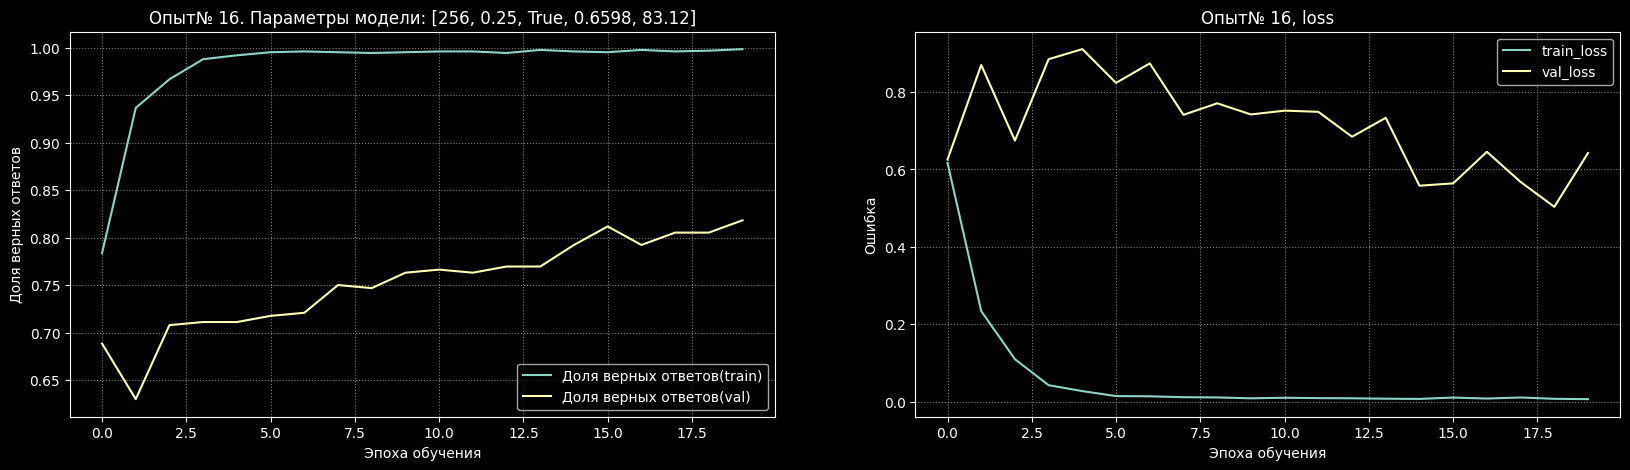

In [ ]:
for exp in range(len(val_loss)):
    graphic(loss[exp], acc[exp], val_loss[exp], val_acc[exp],
            par[exp][-1], par[exp][-2], exp, par[exp])

### Сводные результаты обучения 1 слой

Число Нейронов    Значение Dropout    BatchNormalization?   \
1                 32                0.01                  False   
2                 32                0.25                  False   
3                 32                0.01                   True   
4                 32                0.25                   True   
5                 64                0.01                  False   
6                 64                0.25                  False   
7                 64                0.01                   True   
8                 64                0.25                   True   
9                128                0.01                  False   
10               128                0.25                  False   
11               128                0.01                   True   
12               128                0.25                   True   
13               256                0.01                  False   
14               256                0.25                  False   
15               256                0.01                   True   
16               256                0.25                   True   

     Loss тестовой    Точность тестовой   
1            0.4109                82.60  
2            0.4059                82.86  
3            0.7666                77.14  
4            0.7508                77.92  
5            0.4008                83.38  
6            0.3871                83.12  
7            0.7978                77.14  
8            0.7760                78.18  
9            0.3739                84.94  
10           0.3976                83.90  
11           0.6374                81.04  
12           0.8184                78.70  
13           0.4093                82.86  
14           0.3716                84.94  
15           0.7432                80.26  
16           0.6437                78.70

### Сводные результаты обучения 2 слоя

In [ ]:
print('2-й слой нейронов = Вх. слой * 2')
col = [' Число Нейронов ', ' Значение Dropout ',' BatchNormalization? ',' Loss тестовой ', ' Точность тестовой ']
df = pd.DataFrame(par, columns = col, index= np.arange(1, len(par)+1))
df

2-й слой нейронов = Вх. слой * 2


Число Нейронов    Значение Dropout    BatchNormalization?   \
1                 32                0.01                  False   
2                 32                0.25                  False   
3                 32                0.01                   True   
4                 32                0.25                   True   
5                 64                0.01                  False   
6                 64                0.25                  False   
7                 64                0.01                   True   
8                 64                0.25                   True   
9                128                0.01                  False   
10               128                0.25                  False   
11               128                0.01                   True   
12               128                0.25                   True   
13               256                0.01                  False   
14               256                0.25                  False   
15               256                0.01                   True   
16               256                0.25                   True   

     Loss тестовой    Точность тестовой   
1            0.4084                84.16  
2            0.3806                84.16  
3            0.8562                78.96  
4            0.8400                80.78  
5            0.4794                83.64  
6            0.4173                84.68  
7            0.7664                81.30  
8            0.7348                81.82  
9            0.5371                82.08  
10           0.5343                84.16  
11           0.7139                80.78  
12           0.6085                82.86  
13           0.6584                78.44  
14           0.6100                83.12  
15           0.6570                82.60  
16           0.6598                83.12